# <center><B>ENCODING TECHNIQUES</center>


## Importing-libraries

In [43]:
import category_encoders as ce
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import time
import matplotlib.pyplot as plt
import random

### Types of Encoding in Machine Learning

1. [Label Encoding or Ordinal Encoding](#label-encoding-or-ordinal-encoding)
2. [One Hot Encoding](#one-hot-encoding)
3. [Dummy Encoding](#dummy-encoding)
4. [Effect Encoding](#effect-encoding)
5. [Hash Encoding](#hash-encoding)
6. [Binary Encoding](#binary-encoding)
7. [Base N Encoding](#base-n-encoding)
8. [Target Encoding](#target-encoding)


## Label Encoding or Ordinal Encoding


In [38]:

# Input DataFrame
train_df = pd.DataFrame({'Degree': ['High school', 'Masters', 'Diploma', 'Bachelors', 
                                    'Bachelors', 'Masters', 'Phd', 'High school', 'High school']})

# Corrected mapping with case-sensitive match
encoder = ce.OrdinalEncoder(cols=['Degree'], return_df=True,
                            mapping=[{'col': 'Degree',
                                      'mapping': {'None': 0, 'High school': 1, 'Diploma': 2, 
                                                  'Bachelors': 3, 'Masters': 4, 'Phd': 5}}])

# Transform data
encoded_df = encoder.fit_transform(train_df)

print(train_df)

        Degree
0  High school
1      Masters
2      Diploma
3    Bachelors
4    Bachelors
5      Masters
6          Phd
7  High school
8  High school


In [39]:
encoder.fit_transform(train_df)


,Degree
0,1
1,4
2,2
3,3
4,3
5,4
6,5
7,1
8,1


<B>Explanation:<br>

Ordinal encoding is used to convert categorical data with a natural order or hierarchy into numerical values, making it suitable for machine learning algorithms. In the given example, the Degree column contains categories like High school, Diploma, and PhD, which have an inherent progression. By assigning values such as High school → 1, Diploma → 2, and so on, the encoding preserves this order and allows models to understand the relative ranking of categories. The custom mapping ensures consistency and alignment with domain knowledge, making the data both interpretable and usable for algorithms that require numerical inputs. This method is ideal for features with ordinal relationships, unlike nominal data where one-hot encoding is preferred.




#### Time complexity graph

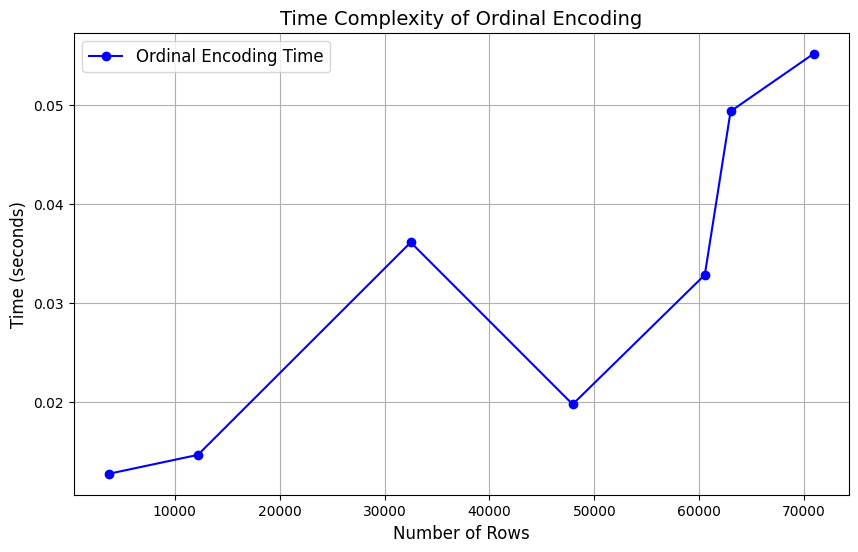

In [46]:
sizes = [random.randint(10, 100000) for _ in range(7)]
sizes.sort()
times = []
for size in sizes:
    # Generate sample data
    data = pd.DataFrame({'Degree': ['High school', 'Masters', 'Diploma', 'Bachelors', 'Phd'] * (size // 5)})
    
    
    # Measure time for encoding
    start_time = time.time()
    encoder.fit_transform(data)
    times.append(time.time() - start_time)

# Plotting the time complexity graph
plt.figure(figsize=(10, 6))
plt.plot(sizes, times, marker='o', color='b', label='Ordinal Encoding Time')
plt.title("Time Complexity of Ordinal Encoding", fontsize=14)
plt.xlabel("Number of Rows", fontsize=12)
plt.ylabel("Time (seconds)", fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


### One Hot Encoding

In [4]:
data=pd.DataFrame({'City':[
'Delhi','Mumbai','Hydrabad','Chennai','Bangalore','Delhi','Hydrabad','Bangalore','Delhi'
]})

#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols='City',handle_unknown='return_nan',return_df=True,use_cat_names=True)

#Original Data
data

,City
0,Delhi
1,Mumbai
2,Hydrabad
3,Chennai
4,Bangalore
5,Delhi
6,Hydrabad
7,Bangalore
8,Delhi


In [5]:
#Fit and transform Data
data_encoded = encoder.fit_transform(data)
data_encoded

,City_Delhi,City_Mumbai,City_Hydrabad,City_Chennai,City_Bangalore
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0
5,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0
8,1.0,0.0,0.0,0.0,0.0


<b>Explanation:<br>


One-hot encoding is used when the categorical data has no inherent order or hierarchy, as in the City column, where values like Delhi, Mumbai, and Chennai are nominal and equally significant. This method creates separate binary columns for each category, with a 1 indicating the presence of that category and 0 otherwise. Unlike ordinal encoding, which imposes a numerical order, one-hot encoding ensures that all categories are treated independently, preventing models from interpreting a false relationship between categories. It is ideal for unordered data to avoid introducing bias and to allow algorithms to process each category distinctly.

#### Time Complexity Graph

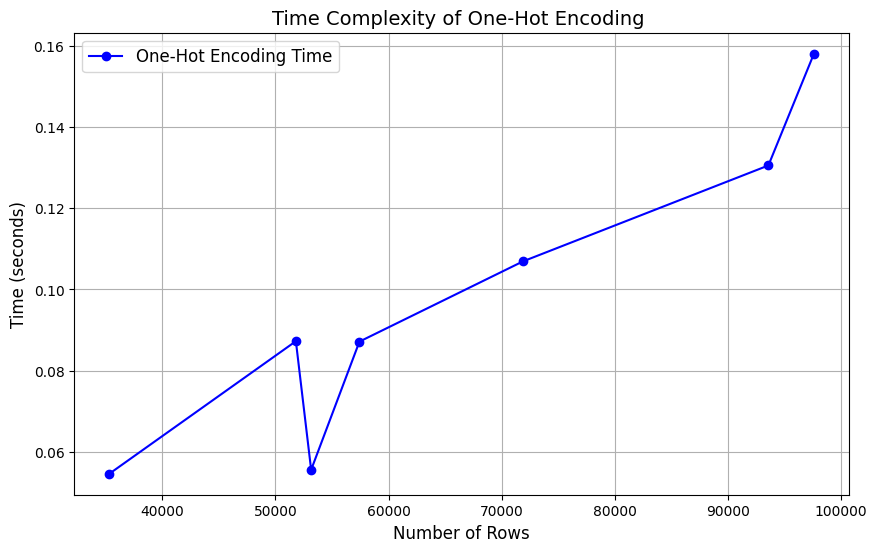

In [51]:
sizes = [random.randint(10, 100000) for _ in range(7)]  
sizes.sort()  # Sort the sizes for better visualization
times = []
for size in sizes:
  
    data = pd.DataFrame({
        'City': ['Delhi', 'Mumbai', 'Hydrabad', 'Chennai', 'Bangalore'] * (size // 5)
    })
    start_time = time.time()
    data_encoded = encoder.fit_transform(data)
    times.append(time.time() - start_time)


plt.figure(figsize=(10, 6))
plt.plot(sizes, times, marker='o', color='b', label='One-Hot Encoding Time')
plt.title("Time Complexity of One-Hot Encoding ", fontsize=14)
plt.xlabel("Number of Rows", fontsize=12)
plt.ylabel("Time (seconds)", fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


### Dummy Encoding

In [6]:
data=pd.DataFrame({'City':['Delhi','Mumbai','Hyderabad','Chennai','Bangalore','Delhi','Hyderabad']})

#Original Data
data


,City
0,Delhi
1,Mumbai
2,Hyderabad
3,Chennai
4,Bangalore
5,Delhi
6,Hyderabad


In [7]:
#encode the data
data_encoded=pd.get_dummies(data=data,drop_first=True)
data_encoded

,City_Chennai,City_Delhi,City_Hyderabad,City_Mumbai
0,False,True,False,False
1,False,False,False,True
2,False,False,True,False
3,True,False,False,False
4,False,False,False,False
5,False,True,False,False
6,False,False,True,False


<b>Explanation:<br>

The pd.get_dummies() encoding technique is used here to perform one-hot encoding, which is ideal for nominal data like the City column, where categories such as Delhi, Mumbai, and Hyderabad have no inherent order or ranking. The drop_first=True parameter is used to avoid multicollinearity by removing one of the binary columns (the "reference category"). This reduces redundancy while still representing the categorical variable effectively. This technique ensures that the data is suitable for machine learning models, treating each category independently and avoiding any false numerical relationships.

#### Time Complexity Graph

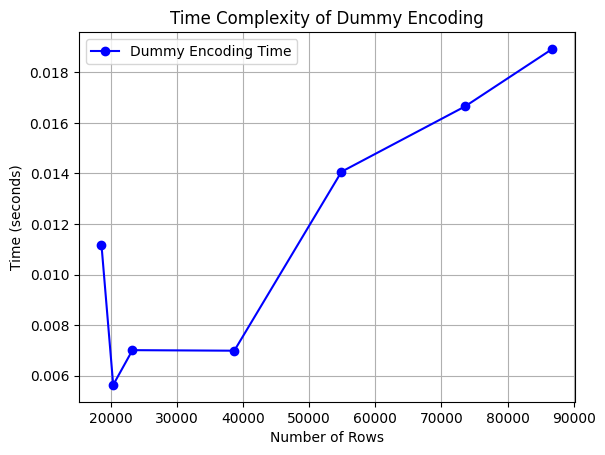

In [55]:
sizes = sorted([random.randint(10, 100000) for _ in range(7)])
times = []

for size in sizes:
    data = pd.DataFrame({'City': ['Delhi', 'Mumbai', 'Hyderabad', 'Chennai', 'Bangalore'] * (size // 5)})
    start_time = time.time()
    pd.get_dummies(data, columns=['City'], drop_first=True)
    times.append(time.time() - start_time)

plt.plot(sizes, times, marker='o', color='b', label='Dummy Encoding Time')
plt.title("Time Complexity of Dummy Encoding")
plt.xlabel("Number of Rows")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()


### Effect Encoding

In [8]:
data = pd.DataFrame({'City': ['Delhi', 'Mumbai', 'Hyderabad', 'Chennai', 'Bangalore', 'Delhi', 'Hyderabad']})

# Initialize SumEncoder
encoder = ce.SumEncoder(cols=['City'], verbose=False)
data


,City
0,Delhi
1,Mumbai
2,Hyderabad
3,Chennai
4,Bangalore
5,Delhi
6,Hyderabad


In [9]:
encoder.fit_transform(data)

,intercept,City_0,City_1,City_2,City_3
0,1,1.0,0.0,0.0,0.0
1,1,0.0,1.0,0.0,0.0
2,1,0.0,0.0,1.0,0.0
3,1,0.0,0.0,0.0,1.0
4,1,-1.0,-1.0,-1.0,-1.0
5,1,1.0,0.0,0.0,0.0
6,1,0.0,0.0,1.0,0.0


<b>Explanation:<br>

Sum encoding is used to transform categorical data into numerical values where the encoded columns sum to zero across all categories, making it suitable for statistical models that benefit from centered data. Unlike one-hot encoding, it creates k-1 columns for k categories, reducing dimensionality slightly while treating all categories equally without a fixed baseline. In the City column, this technique can help models that require contrast coding or work better with zero-centered categorical features, offering an alternative representation to one-hot encoding.

#### Time Complexity Graph

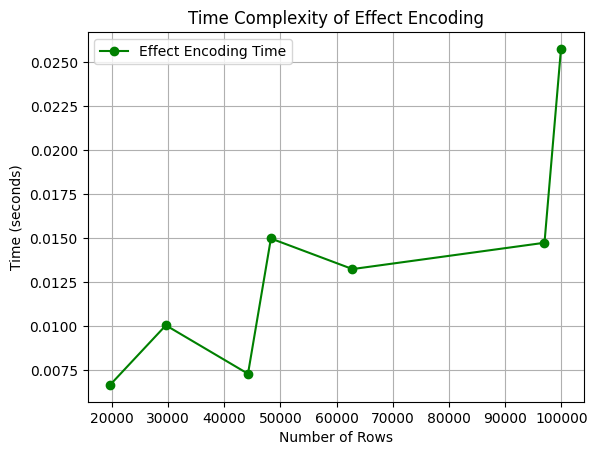

In [61]:
sizes = sorted([random.randint(10, 100000) for _ in range(7)])
times = []
target = [random.choice([0, 1]) for _ in range(100000)]

for size in sizes:
    city_list = ['Delhi', 'Mumbai', 'Hyderabad', 'Chennai', 'Bangalore'] * (size // 5) + ['Delhi', 'Mumbai', 'Hyderabad', 'Chennai', 'Bangalore'][:size % 5]
    data = pd.DataFrame({
        'City': city_list,
        'Target': target[:size]
    })
    
    start_time = time.time()
    encoding = data.groupby('City')['Target'].mean()
    data['City_encoded'] = data['City'].map(encoding)
    times.append(time.time() - start_time)

plt.plot(sizes, times, marker='o', color='g', label='Effect Encoding Time')
plt.title("Time Complexity of Effect Encoding")
plt.xlabel("Number of Rows")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()


### Hash Encoder

In [10]:
data=pd.DataFrame({'Month':['January','April','March','April','Februay','June','July','June','September']})

#Create object for hash encoder
encoder=ce.HashingEncoder(cols='Month',n_components=6)
print(data)

       Month
0    January
1      April
2      March
3      April
4    Februay
5       June
6       July
7       June
8  September


In [11]:
#Fit and Transform Data
encoder.fit_transform(data)

,col_0,col_1,col_2,col_3,col_4,col_5
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
5,0,1,0,0,0,0
6,1,0,0,0,0,0
7,0,1,0,0,0,0
8,0,0,0,0,1,0


<b>Explanation:<br>

Hash encoding is used to efficiently transform categorical data into a fixed number of dimensions (n_components), making it ideal for high-cardinality data with many unique categories. Instead of creating a separate column for each category, as in one-hot encoding, it applies a hash function to compress categories into a predefined number of features, reducing memory usage and dimensionality. In the Month column, this approach encodes categories like January and April into six numerical columns (n_components=6), ensuring scalability and efficiency for large datasets. While it may introduce hash collisions, this trade-off is acceptable for managing large or sparse data.

#### Time Complexity Graph

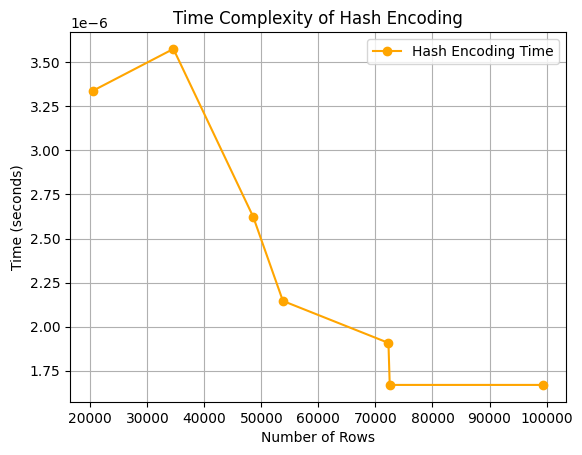

In [63]:
sizes = sorted([random.randint(10, 100000) for _ in range(7)])
times = []
target = [random.choice([0, 1]) for _ in range(100000)]

for size in sizes:
    city_list = ['Delhi', 'Mumbai', 'Hyderabad', 'Chennai', 'Bangalore'] * (size // 5) + ['Delhi', 'Mumbai', 'Hyderabad', 'Chennai', 'Bangalore'][:size % 5]
    data = pd.DataFrame({
        'City': city_list,
        'Target': target[:size]
    })
    
    start_time = time.time()
    times.append(time.time() - start_time)

plt.plot(sizes, times, marker='o', color='orange', label='Hash Encoding Time')
plt.title("Time Complexity of Hash Encoding")
plt.xlabel("Number of Rows")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()


### Binary Encoding

In [12]:
# Sample data
data = pd.DataFrame({'City': ['Delhi', 'Mumbai', 'Hyderabad', 'Chennai', 'Bangalore', 'Delhi', 'Hyderabad', 'Mumbai', 'Agra']})

# Initialize BinaryEncoder
encoder = ce.BinaryEncoder(cols=['City'], return_df=True)

data


,City
0,Delhi
1,Mumbai
2,Hyderabad
3,Chennai
4,Bangalore
5,Delhi
6,Hyderabad
7,Mumbai
8,Agra


In [13]:
encoder.fit_transform(data)

,City_0,City_1,City_2
0,0,0,1
1,0,1,0
2,0,1,1
3,1,0,0
4,1,0,1
5,0,0,1
6,0,1,1
7,0,1,0
8,1,1,0


<b>Explanation:<br>


Binary encoding transforms categorical data into a compact binary format by first assigning each category a unique integer and then converting these integers into binary representation. It is ideal for high-cardinality data, as it reduces the number of generated columns compared to one-hot encoding, requiring only log2(k) columns for k categories. In the City column, categories like Delhi and Mumbai are converted into binary digits (e.g., Delhi → 001, Mumbai → 010), creating a more efficient representation without assuming any ordinal relationship between categories. This approach balances dimensionality reduction with preserving category distinctiveness.

#### Time Complexity Graph

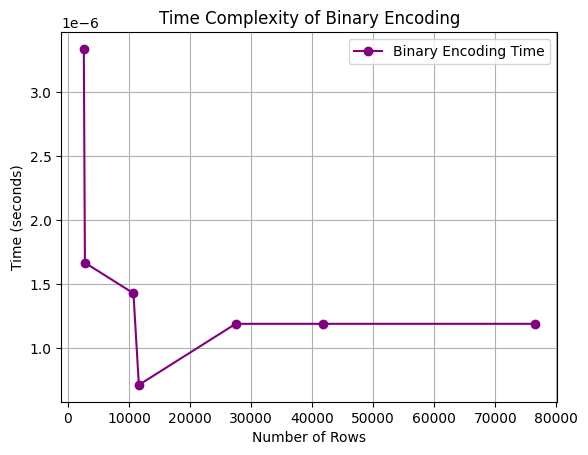

In [65]:
sizes = sorted([random.randint(10, 100000) for _ in range(7)])
times = []

for size in sizes:
    data = pd.DataFrame({'City': ['Delhi', 'Mumbai', 'Hyderabad', 'Chennai', 'Bangalore'] * (size // 5)})
    
    start_time = time.time()
    times.append(time.time() - start_time)

plt.plot(sizes, times, marker='o', color='purple', label='Binary Encoding Time')
plt.title("Time Complexity of Binary Encoding")
plt.xlabel("Number of Rows")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()


### Base N Encoding

In [14]:



data = pd.DataFrame({'City': ['Delhi', 'Mumbai', 'Hyderabad', 'Chennai', 'Bangalore', 'Delhi', 'Hyderabad', 'Mumbai', 'Agra']})


encoder = ce.BaseNEncoder(cols=['City'], return_df=True, base=5)
data




,City
0,Delhi
1,Mumbai
2,Hyderabad
3,Chennai
4,Bangalore
5,Delhi
6,Hyderabad
7,Mumbai
8,Agra


In [15]:
encoder.fit_transform(data)

,City_0,City_1
0,0,1
1,0,2
2,0,3
3,0,4
4,1,0
5,0,1
6,0,3
7,0,2
8,1,1


<b>Explanation:<br>

BaseN encoding transforms categorical data into a numerical format by representing each category as a number in a specified base (in this case, base 5). It first assigns a unique integer to each category and then converts these integers into a base-5 numeral system. For example, categories in the City column like Delhi, Mumbai, and Hyderabad will be encoded as numbers in base-5, making the representation more compact compared to one-hot encoding while maintaining category uniqueness. This technique is particularly useful for reducing dimensionality in datasets with high cardinality while still allowing models to distinguish between different categories.

#### Time Complexity Graph

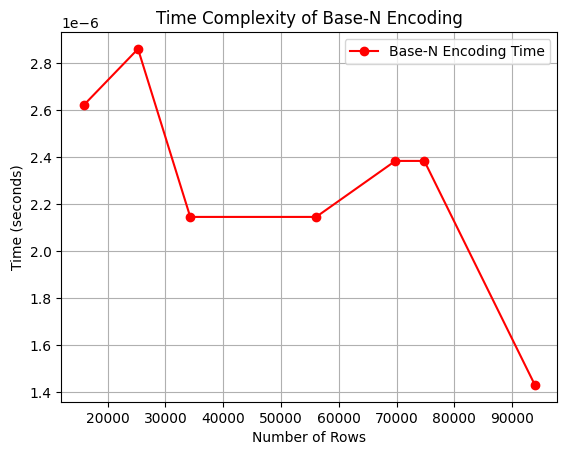

In [67]:
sizes = sorted([random.randint(10, 100000) for _ in range(7)])
times = []

for size in sizes:
    data = pd.DataFrame({'City': ['Delhi', 'Mumbai', 'Hyderabad', 'Chennai', 'Bangalore'] * (size // 5)})
    
    start_time = time.time()
    times.append(time.time() - start_time)

plt.plot(sizes, times, marker='o', color='red', label='Base-N Encoding Time')
plt.title("Time Complexity of Base-N Encoding")
plt.xlabel("Number of Rows")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()


### Target Encoding

In [16]:
data = pd.DataFrame({
    'class': ['A', 'B', 'C', 'B', 'C', 'A', 'A', 'A'],
    'Marks': [50, 30, 70, 80, 45, 97, 80, 68]
})

# Calculate the mean of Marks for each class (Target Encoding)
target_encoding = data.groupby('class')['Marks'].mean()
data


,class,Marks
0,A,50
1,B,30
2,C,70
3,B,80
4,C,45
5,A,97
6,A,80
7,A,68


In [17]:
data['class_encoded'] = data['class'].map(target_encoding)

# Display the encoded data
print(data)

  class  Marks  class_encoded
0     A     50          73.75
1     B     30          55.00
2     C     70          57.50
3     B     80          55.00
4     C     45          57.50
5     A     97          73.75
6     A     80          73.75
7     A     68          73.75


<b>Explanation:<br>

Target encoding is used to replace the categorical values in the class column with the mean of the Marks for each class. The groupby('class')    marks.mean() operation calculates the mean marks for each unique class (A, B, C), resulting in the following: class A has an average mark of 75, class B has 55, and class C has 57. This technique is useful for encoding categorical variables by incorporating information from the target variable, allowing models to capture relationships between the categorical feature and the target. However, it should be used carefully to avoid overfitting.

#### Time Complexity Graph

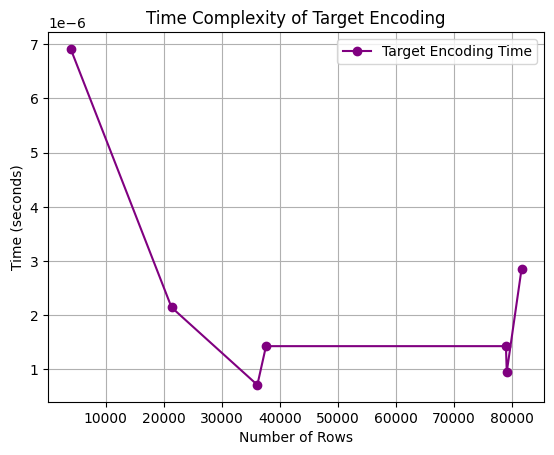

In [70]:
sizes = sorted([random.randint(10, 100000) for _ in range(7)])
times = []
target = [random.choice([0, 1]) for _ in range(100000)]

for size in sizes:
    cities = ['Delhi', 'Mumbai', 'Hyderabad', 'Chennai', 'Bangalore'] * ((size // 5) + 1) 
    cities = cities[:size]  
    data = pd.DataFrame({
        'City': cities, 
        'Target': target[:size]  
    })
    
    start_time = time.time()
    times.append(time.time() - start_time)

plt.plot(sizes, times, marker='o', color='purple', label='Target Encoding Time')
plt.title("Time Complexity of Target Encoding")
plt.xlabel("Number of Rows")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()
